Check mass thresh:

In [1]:
from gal_goku_sims import xi

corr = xi.Corr()
basedir = '/scratch/06536/qezlou/Goku/FOF/HF'
pigs = corr.get_pig_dirs(basedir, z=2.5, narrow=False)

ModuleNotFoundError: No module named 'gal_goku_sims'

In [ ]:
pigs['pig_dirs']

['/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0024/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0025/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0026/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0054/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0055/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0056/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0072/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0073/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0074/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0207/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0208/output/PIG_003',
 '/scratch

In [ ]:
import os
os.mkdi

In [ ]:
np.array(cat['Mass'][10:20])
print(cat['Mass'])
ind = cat['Mass'] > 1e11
new_cat = cat[ind]
print(new_cat, cat)

dask.array<mul, shape=(382736,), dtype=float32, chunksize=(100000,), chunktype=numpy.ndarray> first: 65690550000000.0 last: 81177740000.0
HaloCatalog(size=295748) HaloCatalog(size=382736)


<KeysViewHDF5 ['corr', 'mbins', 'pairs', 'sim_tag']>
<HDF5 dataset "corr": shape (231, 50), type "<f8">


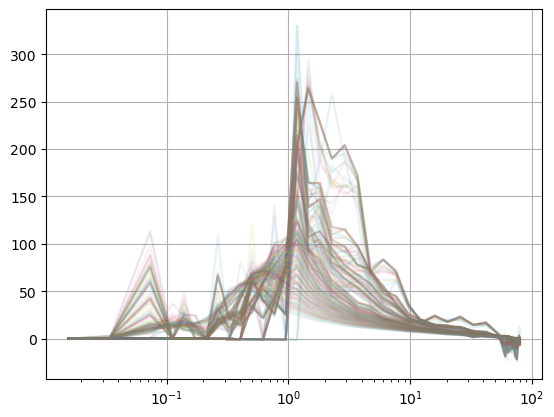

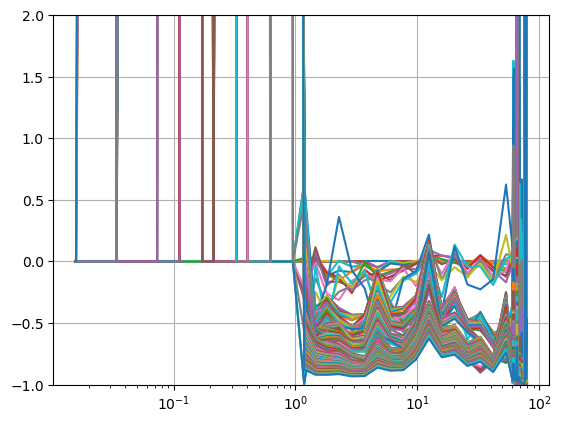

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from gal_goku import utils

save_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
with h5py.File(f'{save_dir}compressed_10p_Box250_Part750_0396.hdf5','r') as f:
    print(f.keys())
    mbins = f['mbins'][:]
    corr = f['corr'][:]
    print(f['corr'])
    fig, ax = plt.subplots()
    figr, axr = plt.subplots()

    for i in range(corr.shape[0]):
        #ax.scatter(mbins, mbins*corr[i], s=10, marker='*')
        ax.plot(mbins, mbins*corr[i], alpha=0.1)
        fit = utils.ConstrainedSplineFitter(logging_level='INFO', degree=3, constraints=False)
        ind = mbins < 10
        knots= mbins[ind]
        #spline = fit.fit_spline(mbins[ind], corr[ind], knots= knots)

        fine_mbins = 10**np.arange(np.log10(mbins[0]), np.log10(mbins[-1])+0.02, 0.05)
        #ax.plot(fine_mbins, fine_mbins*spline(fine_mbins), color='C1')
        ax.set_xscale('log')
        #ax.set_yscale('log')
        ax.grid(True)


        axr.plot(mbins, np.abs(corr[i]/corr[0]) -1 )
        axr.set_xscale('log')
        axr.grid(True)
        axr.set_ylim((-1,2))
    

In [ ]:
mbins = np.arange(13, 10.9,-0.1 )
idx = np.triu_indices(len(mbins), k=0)
pairs = np.column_stack((mbins[idx[0]], mbins[idx[1]]))
len(pairs)

231

In [ ]:
print(f'Node hours needed For L2 = {26*565/60}')

Node hours needed For L2 = 244.83333333333334


In [ ]:
244/20

12.2

Load and check:

In [1]:
from gal_goku import summary_stats

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/'
fid = 'L2'
xi = summary_stats.Xi(data_dir, fid)
corr_file = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/L2/cosmo_10p_Box250_Part750_0112.hdf5'
sim_tag, rbins, corr, mass_pairs=  xi.load_individual(corr_file)
corr_2d, mass_bins = xi.corr_2d(corr_file, r_ind=10)

In [3]:
import numpy as np
ind = np.where(~np.isnan(corr_2d))

In [19]:
np.unique(mass_pairs)[::-1]

array([13. , 12.9, 12.8, 12.7, 12.6, 12.5, 12.4, 12.3, 12.2, 12.1, 12. ,
       11.9, 11.8, 11.7, 11.6, 11.5, 11.4, 11.3, 11.2, 11.1, 11. ])

In [16]:
mass_pairs[0:22]

array([[13. , 13. ],
       [13. , 12.9],
       [13. , 12.8],
       [13. , 12.7],
       [13. , 12.6],
       [13. , 12.5],
       [13. , 12.4],
       [13. , 12.3],
       [13. , 12.2],
       [13. , 12.1],
       [13. , 12. ],
       [13. , 11.9],
       [13. , 11.8],
       [13. , 11.7],
       [13. , 11.6],
       [13. , 11.5],
       [13. , 11.4],
       [13. , 11.3],
       [13. , 11.2],
       [13. , 11.1],
       [13. , 11. ],
       [12.9, 12.9]])

In [17]:
mass_bins.size

21

In [5]:
summary_stats.__file__

'/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-HETDEX-cosmo/src/gal_goku/gal_goku/summary_stats.py'

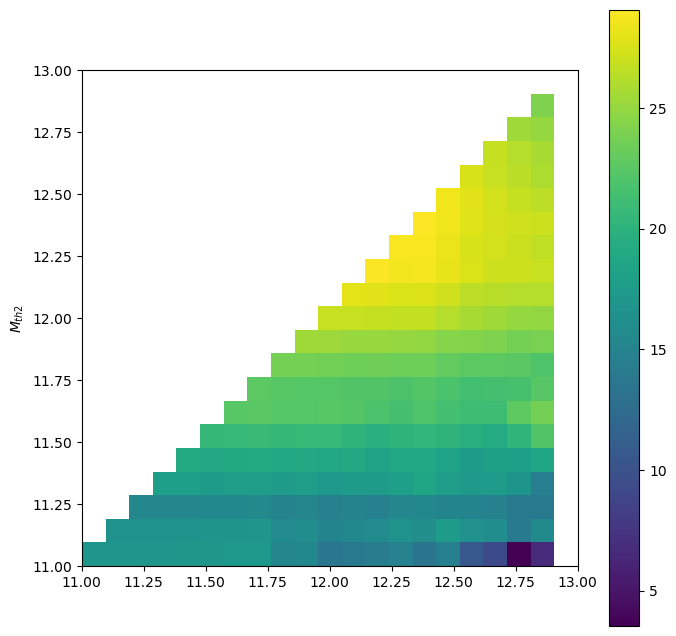

In [1]:
from gal_goku import plot

corr_file = '/home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/L2/cosmo_10p_Box250_Part750_0112.hdf5'
plt_xi = plot.PlotXiSims()
plt_xi.plot_2d_mth1_mth2(r_ind=10, corr_file=corr_file)


## Num of training points for each simulation: 

If we keep only 6 mass theshold bins (instead of 13) and only 5 spline coefficients for the corr func (instead of 50), we have this training points for each simulation:

In [16]:
(mass_pairs.shape[0]/4)*(rbins.size/10)

288.75